# Setup

In [ ]:
!pip install kagglehub

In [16]:
import os
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

### Download the dataset

In [3]:
path = kagglehub.dataset_download("shuyangli94/food-com-recipes-and-user-interactions")
print("Path to dataset files:", path)

# List all files in the dataset directory
dataset_files = os.listdir(path)
print("Files in the dataset:", dataset_files)

Path to dataset files: /home/jweston/.cache/kagglehub/datasets/shuyangli94/food-com-recipes-and-user-interactions/versions/2
Files in the dataset: ['RAW_recipes.csv', 'PP_users.csv', 'interactions_test.csv', 'interactions_train.csv', 'PP_recipes.csv', 'ingr_map.pkl', 'interactions_validation.csv', 'RAW_interactions.csv']


### Create dictionary for each dataset

In [10]:
# Dictionary to store DataFrames for each useful file
dataframes = {}

# Load each useful CSV file into a DataFrame dictionary
for file_name in dataset_files:
    file_path = os.path.join(path, file_name)
    if file_name.endswith('.csv') and os.path.exists(file_path):
        print(f"Loading {file_name} into a DataFrame...")
        df_name = file_name.split('.')[0]  # Use filename without extension as key
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {file_name} with {dataframes[df_name].shape[0]} rows and {dataframes[df_name].shape[1]} columns.")

Loading RAW_recipes.csv into a DataFrame...
Loaded RAW_recipes.csv with 231637 rows and 12 columns.
Loading PP_users.csv into a DataFrame...
Loaded PP_users.csv with 25076 rows and 6 columns.
Loading interactions_test.csv into a DataFrame...
Loaded interactions_test.csv with 12455 rows and 6 columns.
Loading interactions_train.csv into a DataFrame...
Loaded interactions_train.csv with 698901 rows and 6 columns.
Loading PP_recipes.csv into a DataFrame...
Loaded PP_recipes.csv with 178265 rows and 8 columns.
Loading interactions_validation.csv into a DataFrame...
Loaded interactions_validation.csv with 7023 rows and 6 columns.
Loading RAW_interactions.csv into a DataFrame...
Loaded RAW_interactions.csv with 1132367 rows and 5 columns.


### Example: Access the RAW_recipes DataFrame

In [13]:
raw_recipes_df = dataframes.get('RAW_recipes')
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


# EDA: Recipes Dataset

### Top 10 Most Common Tags

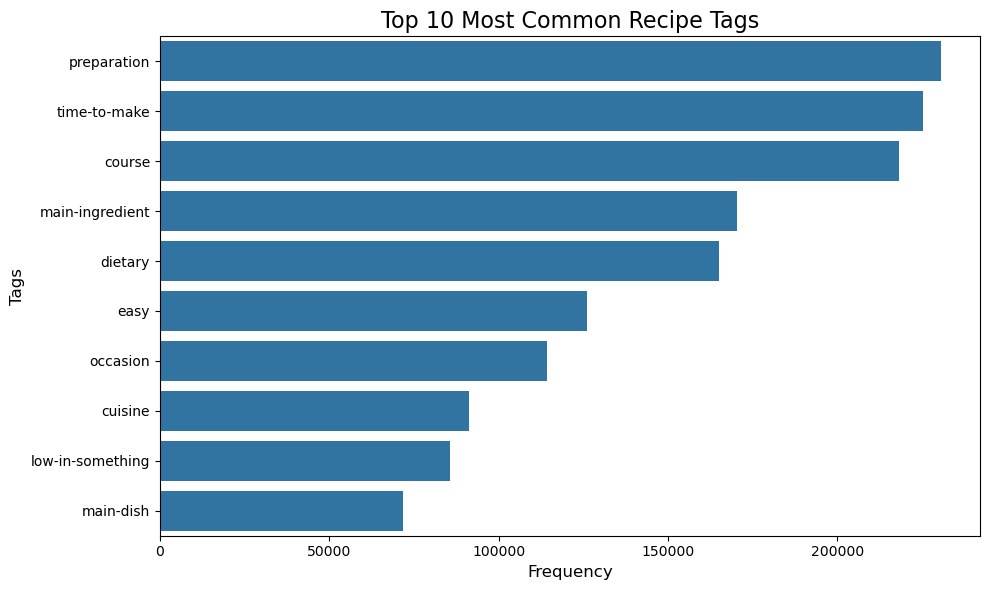

In [18]:
tag_counts = raw_recipes_df['tags'].str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts()
top_tags = tag_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title("Top 10 Most Common Recipe Tags", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Tags", fontsize=12)
plt.tight_layout()
plt.show()

### Number of Ingredients vs. Number of Steps

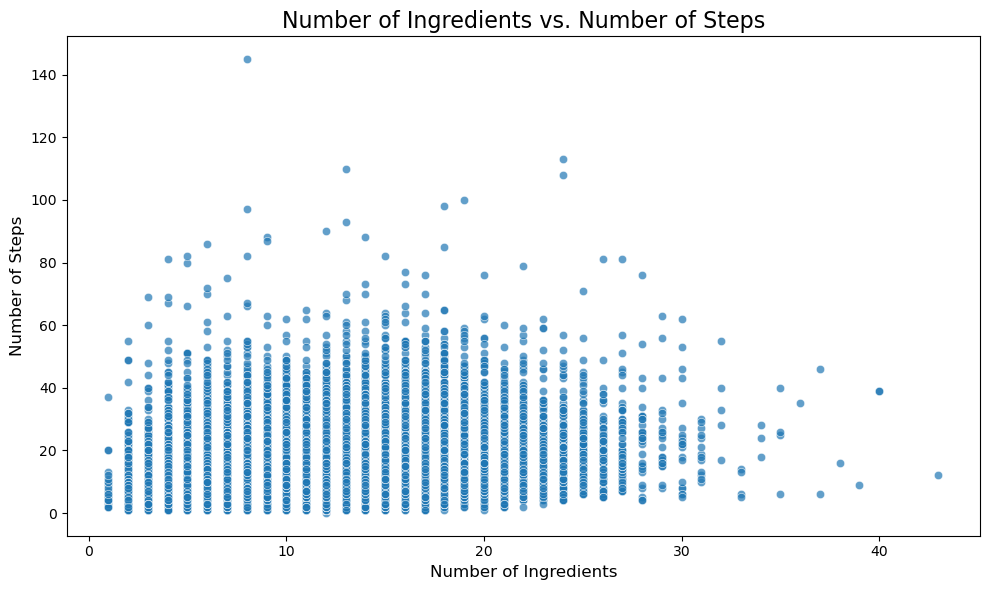

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_ingredients', y='n_steps', data=raw_recipes_df, alpha=0.7)
plt.title("Number of Ingredients vs. Number of Steps", fontsize=16)
plt.xlabel("Number of Ingredients", fontsize=12)
plt.ylabel("Number of Steps", fontsize=12)
plt.tight_layout()
plt.show()